In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
# Reading Dataset
# Dataset is from https://www.kaggle.com/amruthjithrajvr/recruitment-scam
data=pd.read_csv("fake_job_postings.csv")

In [3]:
# Reading top 5 rows of our dataset
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
# To check the number of rows and column
data.shape

(17880, 18)

In [5]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [6]:
# let us check the missing values in our dataset

data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
# Let us remove the columns which are not necessary
# axis =1 specifies that the values are column value and inplace=true to make these changes permanent (ie. make these dropes of columns permanent in the data set)
# We have droped salary range because 70% approx null value
# also job_id and other irrelvent columns because they does not have any logical meaning
data.drop(['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions'],axis=1,inplace = True)

In [8]:
data.shape
data.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [9]:
# Fill NaN values with blank space
# inplace=true to make this change in the dataset permanent
data.fillna(' ', inplace=True)

In [10]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["fraudulent"]]
# Store the variable we are predicting 
target = "fraudulent"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data["fraudulent"]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, Y)

df1 = pd.DataFrame(X_res)
  
df3 = pd.DataFrame(y_res)
  
# the default behaviour is join='outer'
# inner join
  
result = pd.concat([df1, df3], axis=1, join='inner')
display(result)
data=result

(17880, 12)
(17880,)


,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
12141,Driver I,"US, TN, Nashville",,"Novitex Enterprise Solutions, formerly Pitney ...",The Driver I position will be based in our Nas...,Qualifications:Must have 6 months customer ser...,,Full-time,Entry level,High School or equivalent,Consumer Electronics,Customer Service,0
15515,Lead Data Scientist,"GB, LND, London",,"We're Thread, and we're trying to reinvent ret...","As Thread's first recommendations engineer, yo...","Are you the one? You are, if you:Love working ...",,Full-time,Not Applicable,Bachelor's Degree,Internet,Information Technology,0
11181,Network Analyst Tier I-III,"US, TX, Temple",IT Services,"At McLane Intel, we believe that everyone shou...","At McLane Intelligent Solutions, we attribute ...",Experience in providing customer service on-si...,All qualified McLane Intelligent Solutions emp...,Full-time,Associate,Associate Degree,Information Technology and Services,Information Technology,0
14701,Front End Product Manager,"GB, RIC, Twickenham",,With an exceptional record of over 50% growth ...,About WorldstoresWe are the UK’s largest onlin...,Skills and Experience RequiredProduct manageme...,,Full-time,Mid-Senior level,Bachelor's Degree,Retail,Product Management,0
287,Product Designer,"US, PA, Pittsburgh",Product,Everyone has a story to tell. Everyone is uniq...,Closely work with other members of the product...,Required ExperienceMinimum 3 years of experien...,Competitive salary commensurate with skills an...,Full-time,Associate,Bachelor's Degree,Internet,Design,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",,,Student Positions Part-Time and Full-Time.You ...,,,Part-time,,,,,1
17828,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,,,,,,1
17829,Android Developer,"PL, MZ, Warsaw",,,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,,,,,,1
17830,Payroll Clerk,"US, NY, New York",,,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,Full-time,,,Apparel & Fashion,Accounting/Auditing,1


In [11]:
data.isnull().sum() 
# data cleaning done

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [12]:
# we will try to see which country is posting most of the jobs
# Visualize job postings by countries
# we will use the location column for visualizing this data
# In location data is of type (country_name,state,city)
# we neeed to know the country wise data

def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)
data['country']

12141    US
15515    GB
11181    US
14701    GB
287      US
         ..
17827    US
17828    AU
17829    PL
17830    US
17831    US
Name: country, Length: 1732, dtype: object

In [13]:
# For textual type data we will try to create word cloud 
# but before that we will try to create text combining all the data present in
# our database.
data['text'] = data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']+' '+data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']
del data['employment_type']

In [14]:
data.head()

,fraudulent,text
12141,0,"Driver I US, TN, Nashville Novitex Enterprise..."
15515,0,"Lead Data Scientist GB, LND, London We're Thre..."
11181,0,"Network Analyst Tier I-III US, TX, Temple At M..."
14701,0,"Front End Product Manager GB, RIC, Twickenham ..."
287,0,"Product Designer US, PA, Pittsburgh Everyone h..."


In [15]:
# NLTK :: Natural Language Toolkit
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mvaib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
#loading the stopwords
stop_words = set(stopwords.words("english"))

In [18]:
#converting all the text to lower case
data['text'] = data['text'].apply(lambda x:x.lower())

In [19]:
#removing the stop words from the corpus
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

In [20]:
data['text']

12141    driver us, tn, nashville novitex enterprise so...
15515    lead data scientist gb, lnd, london we're thre...
11181    network analyst tier i-iii us, tx, temple mcla...
14701    front end product manager gb, ric, twickenham ...
287      product designer us, pa, pittsburgh everyone s...
                               ...                        
17827    student positions part-time full-time. us, ca,...
17828    sales associate au, nsw, sydney learn earn exe...
17829    android developer pl, mz, warsaw infullmobile ...
17830    payroll clerk us, ny, new york job description...
17831    furniture mover us, il, chicago anthony warren...
Name: text, Length: 1732, dtype: object

In [21]:
from sklearn.model_selection import train_test_split
# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)

In [22]:
# what does X-train and y_train contain
print(y_train)
print(X_train)


11245    0
17811    1
10080    0
15794    0
2362     0
        ..
1413     0
11757    1
3221     0
3796     0
3793     0
Name: fraudulent, Length: 1212, dtype: int64
11245    community / marketing coordinator us, ca, los ...
17811    agency sales managers $150-$175,000/yr us, ny,...
10080    administrative assistant - part-time (nw georg...
15794    live ops manager gb, lnd, london space ape gam...
2362     programmer - developer gr, e, larisa, volos ne...
                               ...                        
1413     tse / sr. tse in, , job description :- handlin...
11757    utc lead testing technician us, ca, bakersfiel...
3221     mobile apps developer gr, i, nea ionia young s...
3796     graduates: english teacher abroad us, tx, irvi...
3793     marketing trainee- russian market gr, i, athen...
Name: text, Length: 1212, dtype: object


In [23]:
# The model cannot operate text data so we need to convert our data into vector format
# we will be using Bag of words model 
from sklearn.feature_extraction.text import CountVectorizer

#  instantiate the vectorizer
vect = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix
# fit
vect.fit(X_train)

# transform training data
X_train_dtm = vect.transform(X_train)


In [24]:
# examine the document-term matrix
X_train_dtm

#how X_train_dtm is looking
print(X_train_dtm)
# This is Matrix representation,non 0 valued cells are not printed


  (0, 32)	3
  (0, 43)	1
  (0, 169)	1
  (0, 261)	1
  (0, 388)	1
  (0, 406)	1
  (0, 566)	1
  (0, 608)	1
  (0, 659)	1
  (0, 887)	2
  (0, 1202)	1
  (0, 1219)	3
  (0, 1255)	1
  (0, 1270)	1
  (0, 1314)	2
  (0, 1395)	1
  (0, 1482)	1
  (0, 1708)	1
  (0, 1775)	1
  (0, 1803)	1
  (0, 1991)	1
  (0, 2180)	1
  (0, 2277)	1
  (0, 2284)	1
  (0, 2292)	1
  :	:
  (1211, 15287)	1
  (1211, 15347)	1
  (1211, 15429)	1
  (1211, 15499)	1
  (1211, 15676)	7
  (1211, 15788)	1
  (1211, 16476)	1
  (1211, 16639)	1
  (1211, 16683)	3
  (1211, 16868)	1
  (1211, 17258)	2
  (1211, 17338)	1
  (1211, 17966)	1
  (1211, 18011)	1
  (1211, 18370)	1
  (1211, 18510)	2
  (1211, 18620)	3
  (1211, 18972)	1
  (1211, 19266)	1
  (1211, 19376)	1
  (1211, 19903)	2
  (1211, 19930)	1
  (1211, 20120)	1
  (1211, 20200)	1
  (1211, 20321)	1


In [25]:
# PCA is not advisable for a NLP task,because PCA is for 
# principal feature extraction and in this case we already have features

In [26]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<520x20821 sparse matrix of type '<class 'numpy.int64'>'
	with 80622 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,  classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [28]:
# Naive Bayes Classifier
# we are using Multinomial Naive Bayes approach because the data here is not symmetrical.
# generally if there are data in the form of this long text,it is advisable to 
# %time will give the time taken by the system for execution
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: total: 0 ns
Wall time: 11.3 ms


MultinomialNB()

In [29]:
y_pred_nb = nb.predict(X_test_dtm)
print(y_pred_nb)

[1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0
 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0
 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1
 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1
 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1
 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1
 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1
 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1
 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0
 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1
 0 1 1 0 1 0 0 0 1 0 0 1 

Classification Accuracy: 0.9230769230769231
Classification Report

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       246
           1       0.93      0.93      0.93       274

    accuracy                           0.92       520
   macro avg       0.92      0.92      0.92       520
weighted avg       0.92      0.92      0.92       520

Confusion Matrix

[[226  20]
 [ 20 254]]


Text(95.72222222222221, 0.5, 'Truth')

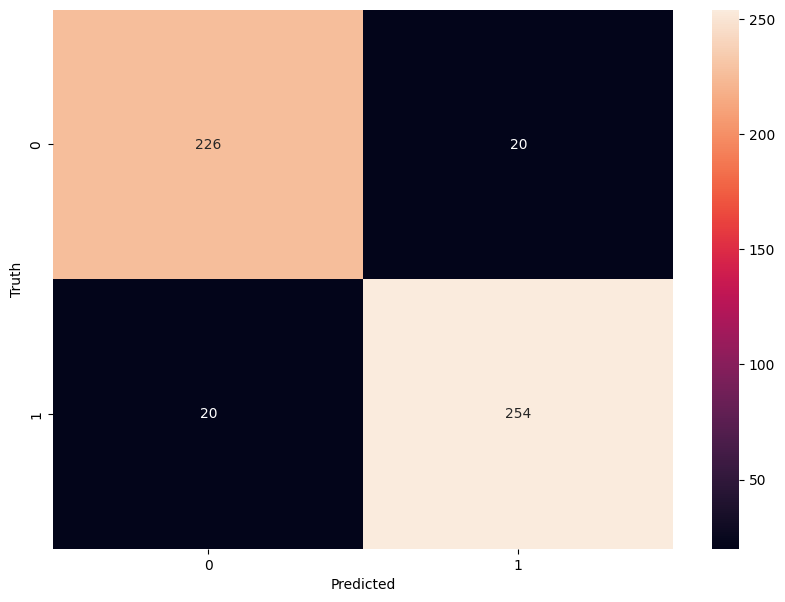

In [30]:
import seaborn as sn

accuracy_score(y_test, y_pred_nb)
print("Classification Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report\n")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_nb))


cm = confusion_matrix(y_test,y_pred_nb)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
#instantiate a Decision Tree Classifier
dt = DecisionTreeClassifier()

In [32]:
#train the model 
# using X_train_dtm (timing it with an IPython "magic command")

%time dt.fit(X_train_dtm, y_train)

CPU times: total: 531 ms
Wall time: 2.1 s


DecisionTreeClassifier()

In [33]:
# make class predictions for X_test_dtm
y_pred_class = dt.predict(X_test_dtm)

In [34]:
# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred_class))
print("Classification Report\n")
print(classification_report(y_test, y_pred_class))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_class))



Classification Accuracy: 0.8557692307692307
Classification Report

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       246
           1       0.85      0.89      0.87       274

    accuracy                           0.86       520
   macro avg       0.86      0.85      0.85       520
weighted avg       0.86      0.86      0.86       520

Confusion Matrix

[[202  44]
 [ 31 243]]


In [35]:
#Lets Predict for a data set
X_test

1407     data entry admin/clerical positions - work hom...
2379     administrative assistant/receptionist us, fl, ...
17252    wf2 warehousing apprenticeship nas 16-18 year ...
9232     senior software engineer us, tx, austin csd?cs...
5498     home based payroll data entry clerk position -...
                               ...                        
6216     head marketing us, , brooklyn commonbond build...
2013     contract - design engineer us, tx, houston ake...
17413    junior back end developer - java gb, lnd, lond...
2497     front end software engineer gr, i, athens cert...
8647     payroll clerk us, md, baltimore dyncorp intern...
Name: text, Length: 520, dtype: object

In [ ]:
print(X_test[8973])

In [37]:
input_text=["customer service associate us, ca, san francisco novitex enterprise solutions, formerly pitney bowes management services, delivers innovative document communications management solutions help companies around world drive business process efficiencies, increase productivity, reduce costs improve customer satisfaction. almost 30 years, clients turned us integrate optimize enterprise-wide business processes empower employees, increase productivity maximize results. trusted partner, continually focus delivering secure, technology-enabled document communications solutions improve clients' work processes, enhance customer interactions drive growth. customer service associate based san francisco, ca. right candidate integral part talented team, supporting continued growth.responsibilities:perform various mail center activities (sorting, metering, folding, inserting, delivery, pickup, etc.)lift heavy boxes, files paper neededmaintain highest levels customer care demonstrating friendly cooperative attitudedemonstrate flexibility satisfying customer demands high volume, production environmentconsistently adhere business procedure guidelinesadhere safety procedurestake direction supervisor site managermaintain logs reporting documentation; attention detailparticipate cross-training perform duties assigned (filing, outgoing shipments, etc)operating mailing, copy scanning equipmentshipping &amp; receivinghandle time-sensitive material like confidential, urgent packagesperform tasks assignedscanning incoming mail recipientsperform file purges pullscreate files ship filesprovide backfill neededenter information daily spreadsheetsidentify charges match billingsort deliver mail, small packages minimum requirements:minimum 6 months customer service related experience requiredhigh school diploma equivalent (ged) requiredpreferred qualifications:keyboarding windows environment pc skills required (word, excel powerpoint preferred)experience running mail posting equipment plusexcellent communication skills verbal writtenlifting 55 lbs without accommodationswillingness availability work additional hours assignedwillingness submit pre-employment drug screening criminal background checkability effectively work individually team environmentcompetency performing multiple functional tasksability meet employer's attendance policy computer software"]

In [38]:
# convert text to feature vectors
input_data_features = vect.transform(input_text)

# making prediction

prediction = dt.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Fraudulant Job')

else:
  print('Real Job')

[0]
Real Job


In [39]:
import pickle

In [41]:
# Save the model to a file
with open('job_fraud_model.pkl', 'wb') as file:
    pickle.dump(dt, file)

In [42]:
with open('job_fraud_vectorizer.pkl', 'wb') as file:
    pickle.dump(vect, file)